<a href="https://colab.research.google.com/github/Tejas-Chaudhari-007/Masters-Project---Machine-Learning/blob/main/Dmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
# Data manipulations
import pandas as pd
import numpy as np

import math
import time
from collections import OrderedDict
!pip install ordered_set
from ordered_set import OrderedSet

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Alloy formulae split
!pip install pymatgen
from pymatgen.core.composition import Composition

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Feature selection
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_regression

# Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
!pip install catboost
from catboost import CatBoostRegressor

# Performance
from sklearn.model_selection import cross_val_score
from sklearn import metrics

     |████████████████████████████████| 69.2MB 40kB/s 


# Preliminary data processing

## Read data

In [ ]:
as_read_elemental_properties_data_df = pd.read_excel('/content/drive/MyDrive/DDP/As received data/Elemental Properties Data.xlsx', index_col=0)

as_read_Dmax_data_df = pd.read_csv('/content/drive/MyDrive/DDP/As received data/Dmax Dataset.csv')

as_read_mixing_enthalpy_df = pd.read_excel('/content/drive/MyDrive/DDP/As received data/Enthalpy of mixing.xlsx', index_col=0)

display(as_read_elemental_properties_data_df)
print(as_read_elemental_properties_data_df.shape)

display(as_read_Dmax_data_df)

display(as_read_mixing_enthalpy_df)

,Eea (ev),I1 (ev),I2 (ev),Tm (K),AW,AN,Rm (nm),Rc (nm),Gp,P,VEC,sVEC,pVEC,dVEC,XP,XM,Cp (J/molK),K (W/m)/K 300K,W,D,Hf (kJ/mol),LP,Tb (K)
Element,,,,,,,,,,,,,,,,,,,,,,,
Ag,1.30400,7.576,21.45411,1234.9300,107.87000,47,0.1445,0.145,11,5,11,1,0,10,1.93,1.83,25.350,429.000,4.64,10.500,11.300,18.005,2435.15
Al,0.43280,5.986,18.82883,933.4700,26.98154,13,0.1432,0.121,13,3,3,2,1,0,1.61,1.37,24.200,237.000,4.19,2.700,10.790,16.472,2792.15
Au,2.30900,9.226,20.52132,1337.3300,196.97000,79,0.1442,0.136,11,6,11,1,0,10,2.54,2.33,25.418,317.000,5.32,19.300,12.550,18.145,3129.15
B,0.28000,8.298,25.15521,2349.1500,10.81000,5,0.0820,0.084,13,2,3,2,1,0,2.04,1.77,11.087,27.000,4.75,2.340,50.200,86.991,4200.15
Ba,0.14500,5.212,10.00363,1000.1500,137.33000,56,0.2176,0.215,2,6,2,2,0,0,0.89,1.17,28.070,18.400,2.35,3.620,7.750,63.643,2170.15
Be,-0.50000,9.322,18.21112,1560.1500,9.01220,4,0.1128,0.096,2,2,2,2,0,0,1.57,2.01,16.443,200.000,5.08,1.850,12.200,15.788,2742.15
C,1.26200,11.260,24.38306,3823.1500,12.01070,6,0.0773,0.076,14,2,4,2,2,0,2.55,2.51,8.517,129.000,5.00,2.200,117.000,45.803,4300.15
Ca,0.02500,6.113,11.87128,1115.1500,40.07800,20,0.1976,0.176,2,4,2,2,0,0,1.00,1.32,25.929,200.000,2.71,1.540,8.540,41.692,1757.15
Ce,0.57000,5.539,10.88252,1068.1500,140.11600,58,0.1825,0.204,3,6,3,2,0,1,1.12,1.31,26.940,11.400,2.80,6.770,5.460,26.296,3716.15


(55, 23)


,Alloy Formula,Dmax
0,Ag27Cu73,0.0
1,Ag42Fe58,0.0
2,Ag48Cu52,0.0
3,Ag48Fe52,0.0
4,Ag50Fe50,0.0
...,...,...
5929,Pd2Zr48Cu34Al8Ag8,30.0
5930,Ni4Zr48Cu32Al8Ag8,30.0
5931,Zr46Cu27.64Ag8.36Al8Be10,35.0
5932,Zr46Cu31.64Ag8.36Al8Be6,35.0


,H,Li,Be,B,C,N,Na,Mg,Al,Si,P,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Th,U,Pu
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
H,H,-25,2,5,-3,-18,-16,-19,-8,-19,0.5,-16,-46,-60,-54,-39,-28,-34,-23,-23,-23,-6,-8,-8,-14.5,-1,-16,-45,-61,-69,-46,-28,-21,-20,-23,-27,-10,-6,-6,-4,-1,-16,-49,-60,-61,-61,-61,-61,-61,-45,-61,-61,-61,-60,-61,-61,-45,-61,-63,-46,-24,-18,-19,-20,-24,-8,-3,-3,-1,0,-61,-53,-54
Li,-25,Li,-5,-6,-61,-145,4,0,-4,-30,-45.5,11,-1,12,34,37,35,19,26,8,1,-5,-7,-9,-34.5,-29,13,0,8,27,51,49,8,5,-14,-40,-16,-13,-12,-18,-28,16,0,6,7,7,7,8,8,-1,8,9,9,8,9,9,-1,10,30,48,50,29,11,-9,-33,-37,-19,-15,-21,-23,14,30,21
Be,2,-5,Be,0,-15,-39,18,-3,0,-15,-3.5,27,-14,-36,-30,-16,-7,-10,-4,-4,-4,0,4,5,-3.5,7,28,-10,-32,-43,-25,-7,-3,-3,-6,-8,6,11,16,15,18,29,-10,-29,-30,-31,-31,-33,-32,-12,-32,-33,-32,-32,-33,-33,-14,-35,-37,-24,-3,0,-2,-5,-10,0,15,23,25,26,-37,-27,-25
B,5,-6,0,B,-10,-28,18,-4,0,-14,0.5,27,-22,-55,-58,-42,-31,-32,-26,-24,-24,0,4,6,-0.5,10,28,-18,-50,-71,-54,-34,-25,-24,-25,-24,5,13,18,18,23,29,-19,-47,-48,-49,-49,-51,-50,-19,-50,-51,-51,-50,-52,-52,-22,-54,-66,-54,-31,-25,-24,-26,-28,-2,19,27,30,31,-57,-54,-50
C,-3,-61,-15,-10,C,-2,-45,-55,-36,-39,-4.5,-43,-89,-118,-109,-82,-61,-66,-50,-42,-39,-33,-32,-33,-29.5,-14,-44,-87,-117,-131,-102,-67,-39,-35,-35,-32,-32,-27,-27,-23,-13,-43,-90,-116,-116,-117,-116,-118,-117,-87,-117,-118,-117,-116,-118,-117,-88,-119,-123,-101,-60,-42,-35,-32,-30,-20,-20,-19,-13,-12,-123,-105,-102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pb,-1,-21,25,30,-13,-82,-18,-8,-10,-2,4.5,-21,-52,-40,-8,15,28,7,29,17,13,15,5,5,-7.5,6,-23,-56,-48,-33,17,42,26,25,6,-18,3,2,-1,2,1,-25,-62,-51,-50,-49,-49,-49,-48,-53,-48,-47,-46,-46,-45,-45,-50,-45,-23,15,49,44,32,16,-5,2,1,-1,Pb,0,-41,-9,-20
Bi,0,-23,26,31,-12,-80,-20,-10,10,-2,5.5,-24,-56,-46,-14,10,24,3,26,14,10,15,4,4,-7.5,7,-26,-61,-54,-40,12,38,23,23,3,-21,2,1,-1,1,1,-27,-68,-58,-57,-56,-55,-55,-54,-58,-54,-53,-53,-52,-52,-51,-55,-51,-30,9,45,40,29,14,-8,2,1,-1,0,Bi,-48,-15,-26
Th,-61,14,-37,-57,-123,-237,39,-3,-40,-77,-119.5,65,19,0,8,9,2,-8,-11,-30,-39,-24,-30,-39,-72.5,-82,72,27,1,4,20,13,-39,-45,-63,-91,-29,-32,-31,-48,-65,78,30,3,2,2,2,1,1,23,1,1,1,1,1,1,18,0,6,18,12,-16,-39,-64,-94,-78,-39,-28,-41,-48,Th,4,0


In [ ]:
as_read_elemental_properties_data_df.dtypes.value_counts()

float64    16
int64       7
dtype: int64

## Changing data type

### Enthalpy of mixing data

In [ ]:
# Replace all diagonal values with null to change data type of dataframe to numeric
for column_name in as_read_mixing_enthalpy_df.columns:
    as_read_mixing_enthalpy_df.loc[as_read_mixing_enthalpy_df[column_name].apply(lambda x: str(x).isalpha()), column_name] = np.nan

display(as_read_mixing_enthalpy_df.isnull().any().value_counts())
display(as_read_mixing_enthalpy_df)
as_read_mixing_enthalpy_df = as_read_mixing_enthalpy_df.astype('float64')

as_read_mixing_enthalpy_df.info()

True    73
dtype: int64

,H,Li,Be,B,C,N,Na,Mg,Al,Si,P,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Th,U,Pu
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
H,NaN,-25,2,5,-3,-18,-16,-19,-8,-19,0.5,-16,-46,-60,-54,-39,-28,-34,-23,-23,-23,-6,-8,-8,-14.5,-1,-16,-45,-61,-69,-46,-28,-21,-20,-23,-27,-10,-6,-6,-4,-1,-16,-49,-60,-61,-61,-61,-61,-61,-45,-61,-61,-61,-60,-61,-61,-45,-61,-63,-46,-24,-18,-19,-20,-24,-8,-3,-3,-1,0,-61,-53,-54
Li,-25,NaN,-5,-6,-61,-145,4,0,-4,-30,-45.5,11,-1,12,34,37,35,19,26,8,1,-5,-7,-9,-34.5,-29,13,0,8,27,51,49,8,5,-14,-40,-16,-13,-12,-18,-28,16,0,6,7,7,7,8,8,-1,8,9,9,8,9,9,-1,10,30,48,50,29,11,-9,-33,-37,-19,-15,-21,-23,14,30,21
Be,2,-5,NaN,0,-15,-39,18,-3,0,-15,-3.5,27,-14,-36,-30,-16,-7,-10,-4,-4,-4,0,4,5,-3.5,7,28,-10,-32,-43,-25,-7,-3,-3,-6,-8,6,11,16,15,18,29,-10,-29,-30,-31,-31,-33,-32,-12,-32,-33,-32,-32,-33,-33,-14,-35,-37,-24,-3,0,-2,-5,-10,0,15,23,25,26,-37,-27,-25
B,5,-6,0,NaN,-10,-28,18,-4,0,-14,0.5,27,-22,-55,-58,-42,-31,-32,-26,-24,-24,0,4,6,-0.5,10,28,-18,-50,-71,-54,-34,-25,-24,-25,-24,5,13,18,18,23,29,-19,-47,-48,-49,-49,-51,-50,-19,-50,-51,-51,-50,-52,-52,-22,-54,-66,-54,-31,-25,-24,-26,-28,-2,19,27,30,31,-57,-54,-50
C,-3,-61,-15,-10,NaN,-2,-45,-55,-36,-39,-4.5,-43,-89,-118,-109,-82,-61,-66,-50,-42,-39,-33,-32,-33,-29.5,-14,-44,-87,-117,-131,-102,-67,-39,-35,-35,-32,-32,-27,-27,-23,-13,-43,-90,-116,-116,-117,-116,-118,-117,-87,-117,-118,-117,-116,-118,-117,-88,-119,-123,-101,-60,-42,-35,-32,-30,-20,-20,-19,-13,-12,-123,-105,-102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pb,-1,-21,25,30,-13,-82,-18,-8,-10,-2,4.5,-21,-52,-40,-8,15,28,7,29,17,13,15,5,5,-7.5,6,-23,-56,-48,-33,17,42,26,25,6,-18,3,2,-1,2,1,-25,-62,-51,-50,-49,-49,-49,-48,-53,-48,-47,-46,-46,-45,-45,-50,-45,-23,15,49,44,32,16,-5,2,1,-1,NaN,0,-41,-9,-20
Bi,0,-23,26,31,-12,-80,-20,-10,10,-2,5.5,-24,-56,-46,-14,10,24,3,26,14,10,15,4,4,-7.5,7,-26,-61,-54,-40,12,38,23,23,3,-21,2,1,-1,1,1,-27,-68,-58,-57,-56,-55,-55,-54,-58,-54,-53,-53,-52,-52,-51,-55,-51,-30,9,45,40,29,14,-8,2,1,-1,0,NaN,-48,-15,-26
Th,-61,14,-37,-57,-123,-237,39,-3,-40,-77,-119.5,65,19,0,8,9,2,-8,-11,-30,-39,-24,-30,-39,-72.5,-82,72,27,1,4,20,13,-39,-45,-63,-91,-29,-32,-31,-48,-65,78,30,3,2,2,2,1,1,23,1,1,1,1,1,1,18,0,6,18,12,-16,-39,-64,-94,-78,-39,-28,-41,-48,NaN,4,0


<class 'pandas.core.frame.DataFrame'>
Index: 73 entries, H to Pu
Data columns (total 73 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   H       72 non-null     float64
 1   Li      72 non-null     float64
 2   Be      72 non-null     float64
 3   B       72 non-null     float64
 4   C       72 non-null     float64
 5   N       72 non-null     float64
 6   Na      72 non-null     float64
 7   Mg      72 non-null     float64
 8   Al      72 non-null     float64
 9   Si      72 non-null     float64
 10  P       72 non-null     float64
 11  K       72 non-null     float64
 12  Ca      72 non-null     float64
 13  Sc      72 non-null     float64
 14  Ti      72 non-null     float64
 15  V       72 non-null     float64
 16  Cr      72 non-null     float64
 17  Mn      72 non-null     float64
 18  Fe      72 non-null     float64
 19  Co      72 non-null     float64
 20  Ni      72 non-null     float64
 21  Cu      72 non-null     float64
 22  Zn      7

## Data preparation

### Pymatgen trial

In [ ]:
compositions = Composition('Al40Cu60T')
print(np.array(list(compositions.as_dict().keys())))
print(np.array(list(compositions.as_dict().values())))

['Al' 'Cu' 'T0+']
[40. 60.  1.]


### Function to calculate enthalpy of mixing for alloy

In [ ]:
def calculate_H_mix_for_alloy(element_names_list, atomic_fractions_list):
    """
    - Tejas Chaudhari
    """

    # Initiate list to store fractional enthalpies for binary combinations
    fractional_H_mix_for_alloy_list = []

    for i, left_element_name in enumerate(element_names_list):
        for j, right_element_name in enumerate(element_names_list):
            if left_element_name == right_element_name:
                continue
            else:
                print('Elements:', left_element_name, right_element_name)
                # Get binary enthalpy of mixing
                delta_H_mix = as_read_mixing_enthalpy_df.loc[left_element_name, right_element_name]
                print(delta_H_mix)

                # Show current atomic fractions
                print('Atomic fractions:', atomic_fractions_list[i], atomic_fractions_list[j])

                # Get fractional delta_H_mix
                fractional_delta_H_mix = delta_H_mix * atomic_fractions_list[i] * atomic_fractions_list[j]

                # Append
                fractional_H_mix_for_alloy_list.append(fractional_delta_H_mix)

    print('Fractional H_mix:', fractional_H_mix_for_alloy_list)

    H_mix_for_alloy = 4 * np.sum(fractional_H_mix_for_alloy_list)

    print('H_mix for alloy:', H_mix_for_alloy)

    return H_mix_for_alloy

### Data calculations

In [ ]:
# Record start time
start_time = time.time()

# Create list of column names
Dmax_data_column_names_list = ['Alloy formula']
for column_name in as_read_elemental_properties_data_df.columns:

    if column_name in ['sVEC', 'pVEC', 'dVEC']:
        Dmax_data_column_names_list.append(column_name+'_1')
        Dmax_data_column_names_list.append('f_'+column_name)
    else:
        Dmax_data_column_names_list.append(column_name+'_1')
        Dmax_data_column_names_list.append(column_name+'_2')
        Dmax_data_column_names_list.append(column_name+'_D')
        Dmax_data_column_names_list.append(column_name+'_d')

Dmax_data_column_names_list = Dmax_data_column_names_list + ['H_mix', 'S_mix/R', 'S_mis/k_B', 'PHS_mis', 'PHS_mix', 'PHSS', 'V_mm', 'V_mc']
    
# Initiate the dataframe to store all the data
Dmax_data_df= pd.DataFrame(columns=Dmax_data_column_names_list, dtype='float64')  # Columns are added initially to verify if we have left any property while calculation later

# Add alloy formula (id) and target columns
Dmax_data_df['Alloy formula'] = as_read_Dmax_data_df['Alloy Formula']
Dmax_data_df['Dmax'] = as_read_Dmax_data_df['Dmax']


for row_index, alloy_formula_string in enumerate(Dmax_data_df['Alloy formula']):
    print('Index:')
    print(row_index)

    if alloy_formula_string == 'Al40Cu60T': # No element 'T'
        continue

    if '[' in alloy_formula_string: # Skip alloy formulae with multiple brackets
        continue

    if '/' in alloy_formula_string: # Skip alloy formulae with '/'
        continue

    compositions = Composition(alloy_formula_string)
    

    element_names_list = list(compositions.as_dict().keys())
    atoms_array = np.array(list(compositions.as_dict().values()))


    print('Elements:') 
    print(element_names_list)
    print('Number of atoms:')
    print(atoms_array)
    print('Sum of atoms:')
    print(np.sum(atoms_array))
    
    # Get atomic fractions
    atomic_fractions_list = atoms_array / np.sum(atoms_array)
    print('Atomic fractions:')
    print(atomic_fractions_list)

    for selected_elemental_property_name in as_read_elemental_properties_data_df.columns: # Loop over elemental properties

        # Initialize list to store elemental properties
        elemental_property_values_list = np.array([], dtype='f')

        # Get elemental properties for the alloy
        for i, element_name in enumerate(element_names_list): # Loop over element names
            elemental_property = as_read_elemental_properties_data_df.loc[element_name, selected_elemental_property_name]
            elemental_property_values_list = np.append(elemental_property_values_list, elemental_property)

        print(f'{selected_elemental_property_name}: {elemental_property_values_list}')

        if selected_elemental_property_name in ['sVEC', 'pVEC', 'dVEC']:
            Dmax_data_df[selected_elemental_property_name+'_1'][row_index] = np.sum(atomic_fractions_list * elemental_property_values_list)
        else:
            # Elemental properties calculations for all aloys
            Dmax_data_df[selected_elemental_property_name+'_1'][row_index] = np.sum(atomic_fractions_list * elemental_property_values_list)
            Dmax_data_df[selected_elemental_property_name+'_2'][row_index] = np.sum(atomic_fractions_list / elemental_property_values_list)
            Dmax_data_df[selected_elemental_property_name+'_D'][row_index] = np.sqrt(np.sum(atomic_fractions_list * (elemental_property_values_list - Dmax_data_df[selected_elemental_property_name+'_1'][row_index])**2))
            Dmax_data_df[selected_elemental_property_name+'_d'][row_index] = np.sqrt(np.sum(atomic_fractions_list * (1 - elemental_property_values_list/Dmax_data_df[selected_elemental_property_name+'_1'][row_index])**2))
        
        # Atomic volume calculations
        if selected_elemental_property_name == 'Rm (nm)':
            Dmax_data_df['V_mm'][row_index] = np.sum(atomic_fractions_list * 4 / 3 * np.pi * elemental_property_values_list**3)
        elif selected_elemental_property_name == 'Rc (nm)':
            Dmax_data_df['V_mc'][row_index] = np.sum(atomic_fractions_list * 4 / 3 * np.pi * elemental_property_values_list**3)

    # Enthalpy of mixing calculation
    Dmax_data_df['H_mix'][row_index] = calculate_H_mix_for_alloy(element_names_list, atomic_fractions_list)

    # Entropy of mixing calculation
    Dmax_data_df['S_mix/R'][row_index] = - np.sum(atomic_fractions_list * np.log(atomic_fractions_list))

    print('--'*50, '\n')

# Entropy of mixing calculations
Dmax_data_df['S_mis/k_B'] = Dmax_data_df['Rm (nm)'+'_d']**2 / 21.92

# Other thermodynamic calculations
Dmax_data_df['PHS_mis'] = Dmax_data_df['H_mix'] * Dmax_data_df['S_mis/k_B']
Dmax_data_df['PHS_mix'] = Dmax_data_df['H_mix'] * Dmax_data_df['S_mix/R']
Dmax_data_df['PHSS'] = Dmax_data_df['H_mix'] * Dmax_data_df['S_mis/k_B'] * Dmax_data_df['S_mix/R']

# Valence electron distribution calculation
Dmax_data_df['f_sVEC'] = Dmax_data_df['sVEC_1'] / Dmax_data_df['VEC_1'] 
Dmax_data_df['f_pVEC'] = Dmax_data_df['pVEC_1'] / Dmax_data_df['VEC_1'] 
Dmax_data_df['f_dVEC'] = Dmax_data_df['dVEC_1'] / Dmax_data_df['VEC_1'] 

display(Dmax_data_df)

# Save
Dmax_data_df.to_csv('/content/drive/MyDrive/DDP/Stored data/Dmax/Dmax_data_df.csv')

# Display time alapsed
print(f'Time elapsed: {(time.time() - start_time)/60:.3f} minutes.')

Index:
0
Elements:
['Ag', 'Cu']
Number of atoms:
[27. 73.]
Sum of atoms:
100.0
Atomic fractions:
[0.27 0.73]
Eea (ev): [1.304 1.236]
I1 (ev): [7.576 7.726]
I2 (ev): [21.45411 20.29227]
Tm (K): [1234.93 1357.77]
AW: [107.87   63.546]
AN: [47. 29.]
Rm (nm): [0.1445 0.1278]
Rc (nm): [0.145 0.132]
Gp: [11. 11.]
P: [5. 4.]
VEC: [11. 11.]
sVEC: [1. 1.]
pVEC: [0. 0.]
dVEC: [10. 10.]
XP: [1.93 1.9 ]
XM: [1.83 1.85]
Cp (J/molK): [25.35 24.44]
K (W/m)/K 300K: [429. 401.]
W: [4.64 4.7 ]
D: [10.5   8.96]
Hf (kJ/mol): [11.3  13.05]
LP: [18.005 11.872]
Tb (K): [2435.15 2835.15]
Elements: Ag Cu
2.0
Atomic fractions: 0.27 0.73
Elements: Cu Ag
2.0
Atomic fractions: 0.73 0.27
Fractional H_mix: [0.3942, 0.3942]
H_mix for alloy: 3.1536
---------------------------------------------------------------------------------------------------- 

Index:
1
Elements:
['Ag', 'Fe']
Number of atoms:
[42. 58.]
Sum of atoms:
100.0
Atomic fractions:
[0.42 0.58]
Eea (ev): [1.304 0.153]
I1 (ev): [7.576 7.903]
I2 (ev): [21.45

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to b

Streaming output truncated to the last 5000 lines.

Index:
5879
Elements:
['Ca', 'Mg', 'Zn']
Number of atoms:
[60.  17.5 22.5]
Sum of atoms:
100.0
Atomic fractions:
[0.6   0.175 0.225]
Eea (ev): [ 0.025 -0.4   -0.6  ]
I1 (ev): [6.113 7.646 9.394]
I2 (ev): [11.87128 15.0355  17.96445]
Tm (K): [1115.15  923.15  692.68]
AW: [40.078 24.305 65.38 ]
AN: [20. 12. 30.]
Rm (nm): [0.1976 0.1601 0.1395]
Rc (nm): [0.176 0.141 0.122]
Gp: [ 2.  2. 12.]
P: [4. 3. 4.]
VEC: [ 2.  2. 12.]
sVEC: [2. 2. 2.]
pVEC: [0. 0. 0.]
dVEC: [ 0.  0. 10.]
XP: [1.   1.31 1.65]
XM: [1.32 1.67 2.04]
Cp (J/molK): [25.929 24.869 25.39 ]
K (W/m)/K 300K: [200. 156. 116.]
W: [2.71 3.66 4.3 ]
D: [1.54 1.74 7.14]
Hf (kJ/mol): [8.54  8.954 7.322]
LP: [ 41.692 204.748  31.115]
Tb (K): [1757.15 1363.15 1180.15]
Elements: Ca Mg
-6.0
Atomic fractions: 0.6 0.175
Elements: Ca Zn
-22.0
Atomic fractions: 0.6 0.225
Elements: Mg Ca
-6.0
Atomic fractions: 0.175 0.6
Elements: Mg Zn
-4.0
Atomic fractions: 0.175 0.225
Elements: Zn Ca
-22.0
A

,Alloy formula,Eea (ev)_1,Eea (ev)_2,Eea (ev)_D,Eea (ev)_d,I1 (ev)_1,I1 (ev)_2,I1 (ev)_D,I1 (ev)_d,I2 (ev)_1,I2 (ev)_2,I2 (ev)_D,I2 (ev)_d,Tm (K)_1,Tm (K)_2,Tm (K)_D,Tm (K)_d,AW_1,AW_2,AW_D,AW_d,AN_1,AN_2,AN_D,AN_d,Rm (nm)_1,Rm (nm)_2,Rm (nm)_D,Rm (nm)_d,Rc (nm)_1,Rc (nm)_2,Rc (nm)_D,Rc (nm)_d,Gp_1,Gp_2,Gp_D,Gp_d,P_1,P_2,P_D,...,XM_2,XM_D,XM_d,Cp (J/molK)_1,Cp (J/molK)_2,Cp (J/molK)_D,Cp (J/molK)_d,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,K (W/m)/K 300K_d,W_1,W_2,W_D,W_d,D_1,D_2,D_D,D_d,Hf (kJ/mol)_1,Hf (kJ/mol)_2,Hf (kJ/mol)_D,Hf (kJ/mol)_d,LP_1,LP_2,LP_D,LP_d,Tb (K)_1,Tb (K)_2,Tb (K)_D,Tb (K)_d,H_mix,S_mix/R,S_mis/k_B,PHS_mis,PHS_mix,PHSS,V_mm,V_mc,Dmax
0,Ag27Cu73,1.254360,0.797670,0.030189,0.024067,7.685500,0.130125,0.066594,0.008665,20.605967,0.048559,0.515810,0.025032,1324.603200,0.000756,54.535980,0.041172,75.513480,0.013991,19.678059,0.260590,33.8600,0.030917,7.991270,0.236009,0.132309,7.580562,0.007414,0.056036,0.135510,7.392372,0.005771,0.042591,11.000,0.090909,0.000000,0.000000,4.2700,0.236500,0.443959,...,0.542136,0.008879,0.004814,24.685700,0.040520,0.404003,0.016366,408.5600,0.002450,12.430865,0.030426,4.683800,0.213509,0.026638,0.005687,9.375800,0.107187,0.683698,0.072922,12.57750,0.079833,0.776929,0.061771,13.527910,0.076485,2.722803,0.201273,2727.150,0.000368,177.583783,0.065117,3.153600,0.583259,0.000143,0.000452,1.839365,0.000263,0.009795,0.010481,0.0
1,Ag42Fe58,0.636420,4.112936,0.568086,0.892627,7.765660,0.128828,0.161394,0.020783,18.399772,0.055406,2.599128,0.141259,1569.137600,0.000660,284.398283,0.181245,77.695500,0.014279,25.677381,0.330487,34.8200,0.031244,10.364729,0.297666,0.132668,7.580225,0.010069,0.075893,0.137460,7.290491,0.006416,0.046677,9.260,0.110682,1.480676,0.159900,4.4200,0.229000,0.493559,...,0.574746,0.074034,0.042475,25.205000,0.039676,0.123390,0.004895,226.6960,0.008211,172.153207,0.759401,4.645800,0.215248,0.004936,0.001062,8.974600,0.113698,1.298059,0.144637,12.75000,0.079197,1.233896,0.096776,14.262260,0.073535,3.184933,0.223312,2840.570,0.000358,344.997397,0.121454,54.566400,0.680292,0.000263,0.014338,37.121085,0.009754,0.009951,0.010951,0.0
2,Ag48Cu52,1.268640,0.788810,0.033973,0.026779,7.654000,0.130663,0.074940,0.009791,20.849953,0.047999,0.580455,0.027840,1298.806800,0.000772,61.370844,0.047252,84.821520,0.012633,22.144263,0.261069,37.6400,0.028144,8.992797,0.238916,0.135816,7.390657,0.008343,0.061431,0.138240,7.249739,0.006495,0.046982,11.000,0.090909,0.000000,0.000000,4.4800,0.226000,0.499600,...,0.543376,0.009992,0.005429,24.876800,0.040212,0.454636,0.018275,414.4400,0.002416,13.988796,0.033753,4.671200,0.214087,0.029976,0.006417,9.699200,0.103750,0.769384,0.079324,12.21000,0.082325,0.874300,0.071605,14.815840,0.070460,3.064046,0.206809,2643.150,0.000381,199.839936,0.075607,3.993600,0.692347,0.000172,0.000688,2.764957,0.000476,0.010613,0.011139,0.0
3,Ag48Fe52,0.705480,3.766791,0.575039,0.815104,7.746040,0.129156,0.163369,0.021091,18.715738,0.054496,2.630943,0.140574,1534.564400,0.000676,287.879420,0.187597,80.817000,0.013761,25.991682,0.321612,36.0800,0.030213,10.491597,0.290787,0.133892,7.511969,0.010192,0.076120,0.138240,7.249739,0.006495,0.046982,9.440,0.108636,1.498800,0.158771,4.4800,0.226000,0.499600,...,0.571819,0.074940,0.042774,25.220000,0.039652,0.124900,0.004952,247.6240,0.007603,174.260424,0.703730,4.645200,0.215276,0.004996,0.001076,9.132400,0.111788,1.313948,0.143878,12.60000,0.080159,1.249000,0.099127,14.649440,0.071673,3.223918,0.220071,2798.630,0.000363,349.220288,0.124783,55.910400,0.692347,0.000264,0.014779,38.709396,0.010232,0.010229,0.011139,0.0
4,Ag50Fe50,0.728500,3.651409,0.575500,0.789979,7.739500,0.129265,0.163500,0.021125,18.821060,0.054193,2.633050,0.139899,1523.040000,0.000681,288.110000,0.189168,81.857500,0.013589,26.012500,0.317778,36.5000,0.029869,10.500000,0.287671,0.134300,7.489216,0.010200,0.075949,0.138500,7.236155,0.006500,0.046931,9.500,0.107955,1.500000,0.157895,4.5000,0.225000,0.500000,...,0.570843,0.075000,0.042735,25.225000,

Time elapsed: 6.196 minutes.


## Missing values

In [ ]:
# Check rows with missing values
Dmax_data_df.isna().any(axis=1).value_counts()

False    5911
True       23
dtype: int64

Observations:
1. There are 23 rows with missing values

In [ ]:
# Drop the rows with missing values
imputed_Dmax_data_df = Dmax_data_df.drop(index=Dmax_data_df.loc[Dmax_data_df.isna().any(axis=1), :].index, inplace=False)

# Confirm
imputed_Dmax_data_df.isna().any().value_counts()

False    96
dtype: int64

# Exploratory data analysis

## Distribution plots

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

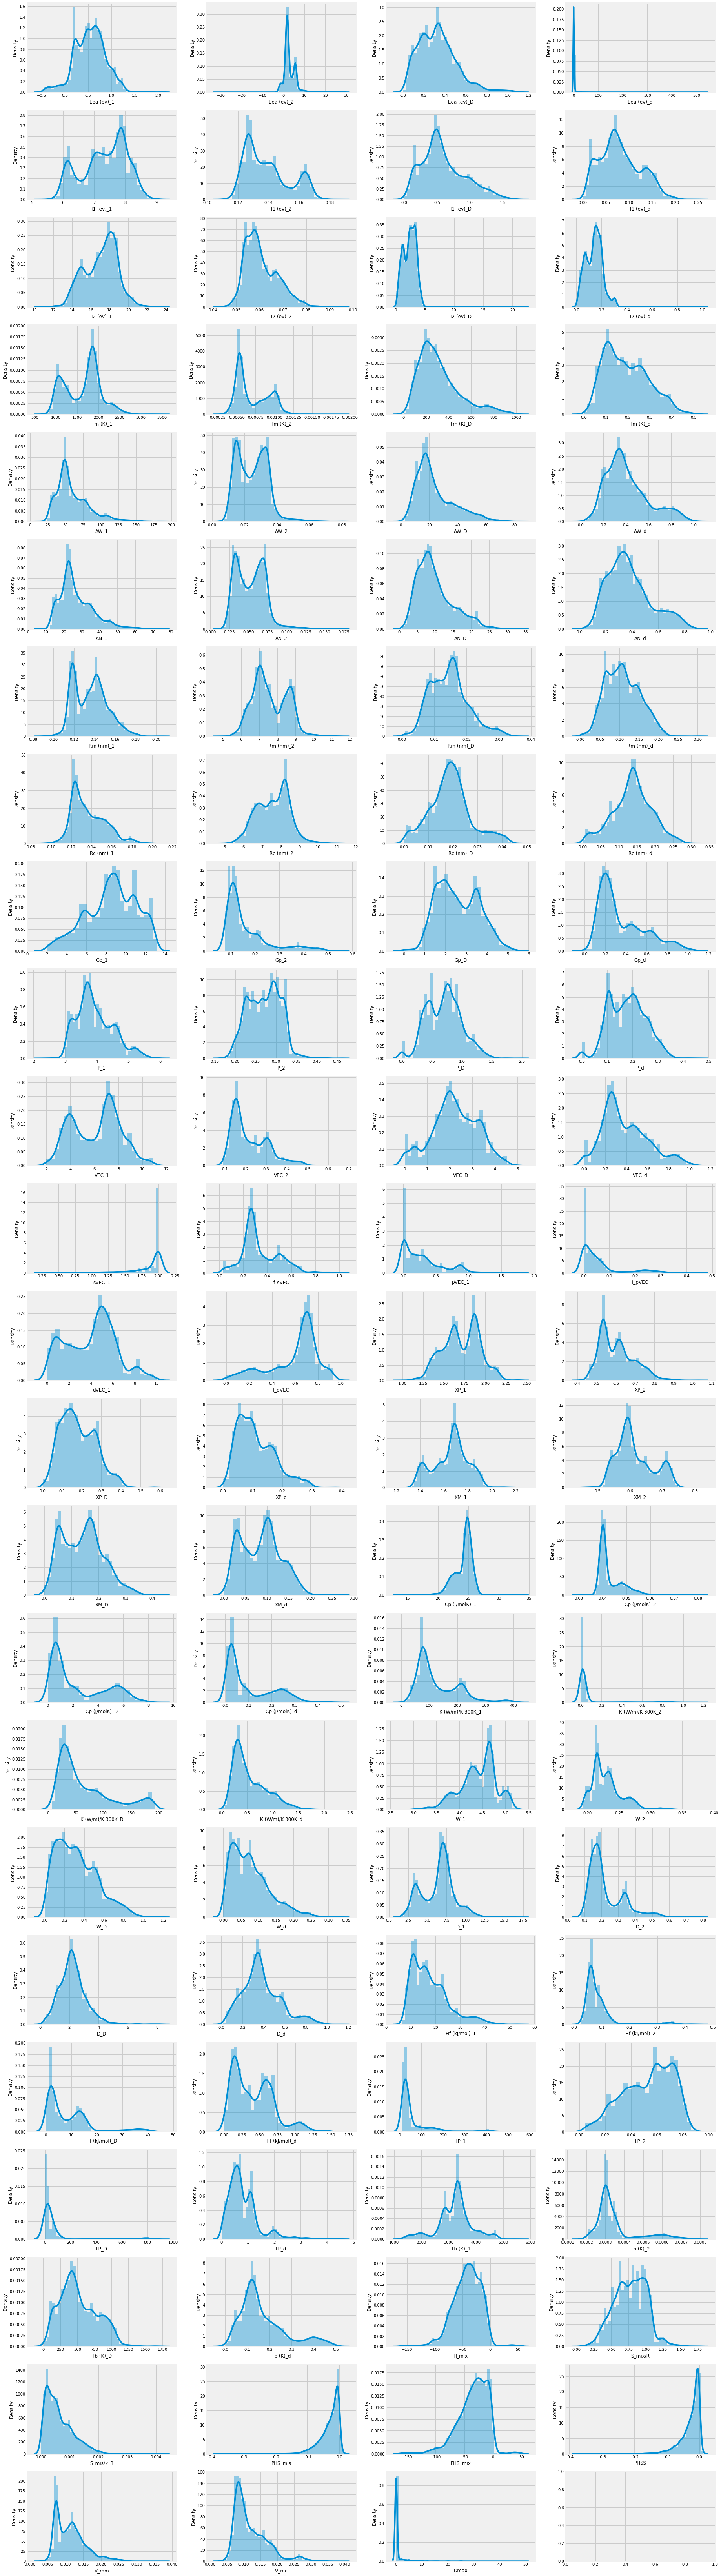

In [ ]:
# Create figure and axes array
n_cols = 4
n_rows = math.ceil(len(imputed_Dmax_data_df.select_dtypes(exclude='object').columns) / n_cols)
figure, axes_array = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols*7, n_rows*5))

# Initialize axes array row and column indices
i = 0 # Row index of axes array of subplots
j = 0 # Column index of axes array of subplots

# Loop over columns to plot
for column_name in imputed_Dmax_data_df.select_dtypes(exclude='object').columns: # 'Id' and 'idhogar' are of 'object' data type
    # Plot in the subplot
    sns.distplot(imputed_Dmax_data_df[column_name], ax=axes_array[i][j])

    # Reset column index of axes array of subplots
    j += 1
    if j == n_cols: 
        j = 0
        i += 1

## Correlation heatmap

In [ ]:
# Get correlation matrix
Dmax_correlation_matrix_df = imputed_Dmax_data_df.corr()

# Plot
plt.figure(figsize=(80,85))
sns.heatmap(abs(Dmax_correlation_matrix_df), annot=True)

# Feature engineering

Useful resources:
1. https://towardsdatascience.com/why-how-and-when-to-apply-feature-selection-e9c69adfabf2

## Set of all features

In [ ]:
# Initialize dictionary to store feature subsets
selected_feature_subsets_dict = OrderedDict()

# Set of all features
selected_feature_subsets_dict['All'] = OrderedSet(imputed_Dmax_data_df.columns[1:-1])

# Display
print(selected_feature_subsets_dict['All'])
print('--'*50)
print(f"Total features in the set: {len(selected_feature_subsets_dict['All'])}")

OrderedSet(['Eea (ev)_1', 'Eea (ev)_2', 'Eea (ev)_D', 'Eea (ev)_d', 'I1 (ev)_1', 'I1 (ev)_2', 'I1 (ev)_D', 'I1 (ev)_d', 'I2 (ev)_1', 'I2 (ev)_2', 'I2 (ev)_D', 'I2 (ev)_d', 'Tm (K)_1', 'Tm (K)_2', 'Tm (K)_D', 'Tm (K)_d', 'AW_1', 'AW_2', 'AW_D', 'AW_d', 'AN_1', 'AN_2', 'AN_D', 'AN_d', 'Rm (nm)_1', 'Rm (nm)_2', 'Rm (nm)_D', 'Rm (nm)_d', 'Rc (nm)_1', 'Rc (nm)_2', 'Rc (nm)_D', 'Rc (nm)_d', 'Gp_1', 'Gp_2', 'Gp_D', 'Gp_d', 'P_1', 'P_2', 'P_D', 'P_d', 'VEC_1', 'VEC_2', 'VEC_D', 'VEC_d', 'sVEC_1', 'f_sVEC', 'pVEC_1', 'f_pVEC', 'dVEC_1', 'f_dVEC', 'XP_1', 'XP_2', 'XP_D', 'XP_d', 'XM_1', 'XM_2', 'XM_D', 'XM_d', 'Cp (J/molK)_1', 'Cp (J/molK)_2', 'Cp (J/molK)_D', 'Cp (J/molK)_d', 'K (W/m)/K 300K_1', 'K (W/m)/K 300K_2', 'K (W/m)/K 300K_D', 'K (W/m)/K 300K_d', 'W_1', 'W_2', 'W_D', 'W_d', 'D_1', 'D_2', 'D_D', 'D_d', 'Hf (kJ/mol)_1', 'Hf (kJ/mol)_2', 'Hf (kJ/mol)_D', 'Hf (kJ/mol)_d', 'LP_1', 'LP_2', 'LP_D', 'LP_d', 'Tb (K)_1', 'Tb (K)_2', 'Tb (K)_D', 'Tb (K)_d', 'H_mix', 'S_mix/R', 'S_mis/k_B', 'PHS_mi

# ML modeling

## Data preprocessing

### Separate X and y data

In [ ]:
# Input data
X_data_df = imputed_Dmax_data_df.iloc[:, 1:-1]

# Display
display(X_data_df)

# Target data
y_data_series = imputed_Dmax_data_df['Dmax']

# Display
display(y_data_series)

,Eea (ev)_1,Eea (ev)_2,Eea (ev)_D,Eea (ev)_d,I1 (ev)_1,I1 (ev)_2,I1 (ev)_D,I1 (ev)_d,I2 (ev)_1,I2 (ev)_2,I2 (ev)_D,I2 (ev)_d,Tm (K)_1,Tm (K)_2,Tm (K)_D,Tm (K)_d,AW_1,AW_2,AW_D,AW_d,AN_1,AN_2,AN_D,AN_d,Rm (nm)_1,Rm (nm)_2,Rm (nm)_D,Rm (nm)_d,Rc (nm)_1,Rc (nm)_2,Rc (nm)_D,Rc (nm)_d,Gp_1,Gp_2,Gp_D,Gp_d,P_1,P_2,P_D,P_d,...,XM_1,XM_2,XM_D,XM_d,Cp (J/molK)_1,Cp (J/molK)_2,Cp (J/molK)_D,Cp (J/molK)_d,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,K (W/m)/K 300K_d,W_1,W_2,W_D,W_d,D_1,D_2,D_D,D_d,Hf (kJ/mol)_1,Hf (kJ/mol)_2,Hf (kJ/mol)_D,Hf (kJ/mol)_d,LP_1,LP_2,LP_D,LP_d,Tb (K)_1,Tb (K)_2,Tb (K)_D,Tb (K)_d,H_mix,S_mix/R,S_mis/k_B,PHS_mis,PHS_mix,PHSS,V_mm,V_mc
0,1.254360,0.797670,0.030189,0.024067,7.685500,0.130125,0.066594,0.008665,20.605967,0.048559,0.515810,0.025032,1324.603200,0.000756,54.535980,0.041172,75.513480,0.013991,19.678059,0.260590,33.8600,0.030917,7.991270,0.236009,0.132309,7.580562,0.007414,0.056036,0.135510,7.392372,0.005771,0.042591,11.000,0.090909,0.000000,0.000000,4.2700,0.236500,0.443959,0.103972,...,1.844600,0.542136,0.008879,0.004814,24.685700,0.040520,0.404003,0.016366,408.5600,0.002450,12.430865,0.030426,4.683800,0.213509,0.026638,0.005687,9.375800,0.107187,0.683698,0.072922,12.57750,0.079833,0.776929,0.061771,13.527910,0.076485,2.722803,0.201273,2727.150,0.000368,177.583783,0.065117,3.153600,0.583259,0.000143,0.000452,1.839365,0.000263,0.009795,0.010481
1,0.636420,4.112936,0.568086,0.892627,7.765660,0.128828,0.161394,0.020783,18.399772,0.055406,2.599128,0.141259,1569.137600,0.000660,284.398283,0.181245,77.695500,0.014279,25.677381,0.330487,34.8200,0.031244,10.364729,0.297666,0.132668,7.580225,0.010069,0.075893,0.137460,7.290491,0.006416,0.046677,9.260,0.110682,1.480676,0.159900,4.4200,0.229000,0.493559,0.111665,...,1.743000,0.574746,0.074034,0.042475,25.205000,0.039676,0.123390,0.004895,226.6960,0.008211,172.153207,0.759401,4.645800,0.215248,0.004936,0.001062,8.974600,0.113698,1.298059,0.144637,12.75000,0.079197,1.233896,0.096776,14.262260,0.073535,3.184933,0.223312,2840.570,0.000358,344.997397,0.121454,54.566400,0.680292,0.000263,0.014338,37.121085,0.009754,0.009951,0.010951
2,1.268640,0.788810,0.033973,0.026779,7.654000,0.130663,0.074940,0.009791,20.849953,0.047999,0.580455,0.027840,1298.806800,0.000772,61.370844,0.047252,84.821520,0.012633,22.144263,0.261069,37.6400,0.028144,8.992797,0.238916,0.135816,7.390657,0.008343,0.061431,0.138240,7.249739,0.006495,0.046982,11.000,0.090909,0.000000,0.000000,4.4800,0.226000,0.499600,0.111518,...,1.840400,0.543376,0.009992,0.005429,24.876800,0.040212,0.454636,0.018275,414.4400,0.002416,13.988796,0.033753,4.671200,0.214087,0.029976,0.006417,9.699200,0.103750,0.769384,0.079324,12.21000,0.082325,0.874300,0.071605,14.815840,0.070460,3.064046,0.206809,2643.150,0.000381,199.839936,0.075607,3.993600,0.692347,0.000172,0.000688,2.764957,0.000476,0.010613,0.011139
3,0.705480,3.766791,0.575039,0.815104,7.746040,0.129156,0.163369,0.021091,18.715738,0.054496,2.630943,0.140574,1534.564400,0.000676,287.879420,0.187597,80.817000,0.013761,25.991682,0.321612,36.0800,0.030213,10.491597,0.290787,0.133892,7.511969,0.010192,0.076120,0.138240,7.249739,0.006495,0.046982,9.440,0.108636,1.498800,0.158771,4.4800,0.226000,0.499600,0.111518,...,1.752000,0.571819,0.074940,0.042774,25.220000,0.039652,0.124900,0.004952,247.6240,0.007603,174.260424,0.703730,4.645200,0.215276,0.004996,0.001076,9.132400,0.111788,1.313948,0.143878,12.60000,0.080159,1.249000,0.099127,14.649440,0.071673,3.223918,0.220071,2798.630,0.000363,349.220288,0.124783,55.910400,0.692347,0.000264,0.014779,38.709396,0.010232,0.010229,0.011139
4,0.728500,3.651409,0.575500,0.789979,7.739500,0.129265,0.163500,0.021125,18.821060,0.054193,2.633050,0.139899,1523.040000,0.000681,288.110000,0.189168,81.857500,0.013589,26.012500,0.317778,36.5000,0.029869,10.500000,0.287671,0.134300,7.489216,0.010200,0.075949,0.138500,7.236155,0.006500,0.046931,9.500,0.107955,1.500000,0.157895,4.5000,0.225000,0.500000,0.111111,...,1.755000,0.570843,0.075000,

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
5929    30.0
5930    30.0
5931    35.0
5932    35.0
5933    50.0
Name: Dmax, Length: 5911, dtype: float64

### Train test split

In [ ]:
# Train test split
X_train_df, X_test_df, y_train_series, y_test_series = train_test_split(X_data_df, y_data_series, test_size=0.15, random_state=7)

# Display
display(X_train_df)
display(X_test_df)
display(y_train_series)
display(y_test_series)

,Eea (ev)_1,Eea (ev)_2,Eea (ev)_D,Eea (ev)_d,I1 (ev)_1,I1 (ev)_2,I1 (ev)_D,I1 (ev)_d,I2 (ev)_1,I2 (ev)_2,I2 (ev)_D,I2 (ev)_d,Tm (K)_1,Tm (K)_2,Tm (K)_D,Tm (K)_d,AW_1,AW_2,AW_D,AW_d,AN_1,AN_2,AN_D,AN_d,Rm (nm)_1,Rm (nm)_2,Rm (nm)_D,Rm (nm)_d,Rc (nm)_1,Rc (nm)_2,Rc (nm)_D,Rc (nm)_d,Gp_1,Gp_2,Gp_D,Gp_d,P_1,P_2,P_D,P_d,...,XM_1,XM_2,XM_D,XM_d,Cp (J/molK)_1,Cp (J/molK)_2,Cp (J/molK)_D,Cp (J/molK)_d,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,K (W/m)/K 300K_d,W_1,W_2,W_D,W_d,D_1,D_2,D_D,D_d,Hf (kJ/mol)_1,Hf (kJ/mol)_2,Hf (kJ/mol)_D,Hf (kJ/mol)_d,LP_1,LP_2,LP_D,LP_d,Tb (K)_1,Tb (K)_2,Tb (K)_D,Tb (K)_d,H_mix,S_mix/R,S_mis/k_B,PHS_mis,PHS_mix,PHSS,V_mm,V_mc
4369,0.097870,-1.449708,0.748380,7.646675,7.65571,0.130682,0.149151,0.019482,16.584475,0.061493,2.443252,0.147322,1062.2960,0.000974,212.086100,0.199649,36.723308,0.033223,18.694254,0.509057,17.37,0.068101,8.071747,0.464695,0.150611,6.712718,0.015066,0.100033,0.13879,7.218976,0.006590,0.047481,4.71,0.375606,4.118968,0.874516,3.32,0.307000,0.487442,0.146820,...,1.7212,0.582530,0.088784,0.051582,24.756910,0.040397,0.265023,0.010705,228.1120,0.005753,114.017603,0.499832,3.96640,0.255580,0.483462,0.121889,3.933300,0.432271,3.301891,0.839471,10.20726,0.100926,1.876788,0.183868,145.494660,0.028792,88.559287,0.608677,1827.21,0.000615,696.511792,0.381189,-5.8272,0.663277,0.000457,-0.002660,-3.865051,-0.001764,0.014729,0.011280
2797,1.092600,1.120529,0.279633,0.255933,7.75700,0.129030,0.236266,0.030458,18.684980,0.054125,2.224180,0.119036,1786.1500,0.000565,188.064351,0.105290,50.844220,0.026441,16.166626,0.317964,24.30,0.055714,7.668768,0.315587,0.119410,8.507361,0.012775,0.106980,0.11870,8.542990,0.012199,0.102770,10.70,0.094835,1.417745,0.132500,3.70,0.283333,0.640312,0.173057,...,1.8280,0.547340,0.043313,0.023694,23.943600,0.044759,4.676810,0.195326,90.0600,0.013200,27.086683,0.300763,5.08000,0.197011,0.141774,0.027908,7.586900,0.175560,2.626201,0.346149,24.05100,0.049763,13.162233,0.547263,21.422300,0.077717,23.626307,1.102884,3322.75,0.000303,310.725667,0.093515,-42.0800,0.639032,0.000522,-0.021971,-26.890461,-0.014040,0.007355,0.007210
5101,0.848250,1.323517,0.284244,0.335095,8.23835,0.122412,0.819227,0.099441,18.873919,0.053046,0.647319,0.034297,1632.0250,0.000822,440.779597,0.270081,77.398406,0.015124,27.422315,0.354301,34.80,0.032521,10.791663,0.310105,0.128545,7.827680,0.009691,0.075391,0.12905,7.801022,0.010230,0.079270,10.50,0.096667,1.500000,0.142857,4.35,0.235833,0.653835,0.150307,...,1.8695,0.537207,0.133584,0.071455,25.804900,0.038780,0.661679,0.025642,73.1485,0.436761,25.905231,0.354146,5.07750,0.196986,0.071545,0.014091,9.621000,0.134358,2.889190,0.300300,15.84720,0.203534,5.063775,0.319538,212.841200,0.070875,599.167667,2.815093,2945.35,0.000461,797.752631,0.270852,-25.5600,0.948915,0.000259,-0.006628,-24.254279,-0.006289,0.009045,0.009169
5381,0.748936,3.725392,0.468275,0.625254,7.16639,0.140523,0.588263,0.082086,16.300676,0.062890,2.505568,0.153709,1768.8116,0.000592,312.532319,0.176691,59.525196,0.018935,19.065088,0.320286,27.48,0.040308,7.957361,0.289569,0.137468,7.357809,0.014869,0.108161,0.14123,7.253876,0.022518,0.159442,8.04,0.157164,3.496913,0.434939,4.08,0.250167,0.568859,0.139426,...,1.6517,0.613838,0.192159,0.116340,25.208705,0.039801,1.324168,0.052528,92.7975,0.023560,92.544888,0.997278,4.59145,0.220594,0.517240,0.112653,6.744605,0.177550,2.322781,0.344391,17.68235,0.061252,7.391014,0.417988,28.182375,0.057342,18.389040,0.652501,3534.40,0.000291,624.215530,0.176611,-92.6520,1.502505,0.000534,-0.049449,-139.210064,-0.074297,0.011268,0.012721
121,-0.357500,1.750000,0.127500,0.356643,7.49270,0.134067,0.459900,0.061380,14.719078,0.068282,0.949266,0.064492,942.3500,0.001065,57.600000,0.061124,25.882300,0.039525,4.731900,0.182824,12.80,0.080000,2.400000,0.187500,0.163850,6.127559,0.011250,0.068660,0.14450,6.951161,0.010500,0.072664,2.00,0.500000,0.000000,0.000000,3.10,0.325000,0.300000,0.096774,...,1.6350,0.614680,0.105000,0.064220,24.975000,0.040046,0.31800

,Eea (ev)_1,Eea (ev)_2,Eea (ev)_D,Eea (ev)_d,I1 (ev)_1,I1 (ev)_2,I1 (ev)_D,I1 (ev)_d,I2 (ev)_1,I2 (ev)_2,I2 (ev)_D,I2 (ev)_d,Tm (K)_1,Tm (K)_2,Tm (K)_D,Tm (K)_d,AW_1,AW_2,AW_D,AW_d,AN_1,AN_2,AN_D,AN_d,Rm (nm)_1,Rm (nm)_2,Rm (nm)_D,Rm (nm)_d,Rc (nm)_1,Rc (nm)_2,Rc (nm)_D,Rc (nm)_d,Gp_1,Gp_2,Gp_D,Gp_d,P_1,P_2,P_D,P_d,...,XM_1,XM_2,XM_D,XM_d,Cp (J/molK)_1,Cp (J/molK)_2,Cp (J/molK)_D,Cp (J/molK)_d,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,K (W/m)/K 300K_d,W_1,W_2,W_D,W_d,D_1,D_2,D_D,D_d,Hf (kJ/mol)_1,Hf (kJ/mol)_2,Hf (kJ/mol)_D,Hf (kJ/mol)_d,LP_1,LP_2,LP_D,LP_d,Tb (K)_1,Tb (K)_2,Tb (K)_D,Tb (K)_d,H_mix,S_mix/R,S_mis/k_B,PHS_mis,PHS_mix,PHSS,V_mm,V_mc
4244,0.947784,1.291882,0.337615,0.356215,7.346800,0.136699,0.467316,0.063608,16.879206,0.060744,2.511227,0.148776,1811.1120,0.000562,234.169684,0.129296,68.937840,0.015085,14.658724,0.212637,31.700,0.032377,5.441507,0.171656,0.135630,7.469373,0.016177,0.119276,0.140100,7.310571,0.022967,0.163934,8.300,0.144091,2.830194,0.340987,4.300,0.235000,0.458258,0.106572,...,1.72400,0.585067,0.153441,0.089003,25.69400,0.038936,0.524923,0.020430,101.3300,0.020080,104.416532,1.030460,4.7600,0.212781,0.514684,0.108127,8.19200,0.124589,1.094722,0.133633,16.85700,0.059759,1.294350,0.076784,21.762700,0.070398,16.524056,0.759283,3599.850,0.000288,715.944977,0.198882,-74.160000,0.897946,0.000649,-0.048132,-66.591655,-0.043220,0.010912,0.012490
5167,0.565760,2.148493,0.347796,0.614742,6.953300,0.144699,0.572365,0.082316,13.878481,0.072588,1.255177,0.090441,2178.2000,0.000472,402.108875,0.184606,90.725750,0.014115,37.454069,0.412827,39.400,0.030834,14.489306,0.367749,0.151820,6.678982,0.016179,0.106569,0.164900,6.225301,0.022691,0.137606,5.600,0.218214,3.541186,0.632355,4.800,0.216667,0.812404,0.169251,...,1.57400,0.641254,0.164116,0.104267,24.52435,0.041097,1.989245,0.081113,44.9750,0.035792,44.496538,0.989362,4.1495,0.242125,0.301438,0.072644,6.87935,0.185534,3.502425,0.509121,23.41750,0.050511,12.205719,0.521222,43.215950,0.025080,8.570453,0.198317,4615.450,0.000220,549.455740,0.119047,-80.520000,0.730588,0.000518,-0.041718,-58.826951,-0.030479,0.015128,0.019754
3002,0.219120,5.636171,0.150549,0.687063,7.859920,0.127544,0.371345,0.047245,17.559860,0.058371,3.191801,0.181767,1925.0600,0.000525,206.629141,0.107336,48.743349,0.029216,15.972555,0.327687,22.670,0.062981,7.444535,0.328387,0.117857,8.673938,0.015065,0.127822,0.125430,8.190772,0.017517,0.139656,8.570,0.121538,1.945533,0.227017,3.700,0.287500,0.714143,0.193012,...,1.68270,0.594819,0.050037,0.029736,22.84055,0.047663,4.962372,0.217261,73.4350,0.015992,19.878966,0.270702,4.6425,0.215474,0.084076,0.018110,6.97570,0.173259,1.958065,0.280698,19.53900,0.063386,12.910181,0.660739,22.869470,0.075293,26.936431,1.177834,3276.950,0.000309,391.548924,0.119486,-27.607200,0.709855,0.000745,-0.020577,-19.597112,-0.014607,0.007165,0.008707
5405,0.369120,5.016286,0.372684,1.009656,8.512800,0.119693,1.264457,0.148536,17.596425,0.058000,2.812681,0.159844,1896.6440,0.000822,852.627046,0.449545,49.551131,0.027289,18.584829,0.375064,23.050,0.057171,8.193137,0.355451,0.117082,8.754281,0.015938,0.136127,0.123640,8.374884,0.019859,0.160622,9.430,0.114098,2.860961,0.303389,3.690,0.287500,0.744245,0.201692,...,1.83330,0.557224,0.295696,0.161292,22.96172,0.048938,5.205360,0.226697,76.4672,0.521483,34.478968,0.450899,4.7225,0.212111,0.196007,0.041505,6.60740,0.204862,2.523271,0.381886,24.12484,0.236980,31.945057,1.324156,256.580620,0.066997,647.771486,2.524631,3052.300,0.000482,1055.120309,0.345680,-66.419200,0.980905,0.000845,-0.056149,-65.150955,-0.055077,0.007069,0.008486
2851,0.407000,1.125973,0.442188,1.086456,7.850580,0.127496,0.236446,0.030118,17.790044,0.057262,2.773860,0.155922,1793.0500,0.000565,225.936916,0.126007,52.439289,0.026255,15.446787,0.294565,24.000,0.057126,7.056912,0.294038,0.121710,8.392272,0.015135,0.124352,0.123300,8.279091,0.015324,0.124278,9.120,0.112723,1.620370,0.177672,3.760,0.280000,0.649923,0.172852,...,1.74840,0.572368,0.046102,0.0

4369    0.1
2797    0.1
5101    0.1
5381    2.0
121     0.0
       ... 
5721    5.0
2551    0.1
538     0.0
1221    0.0
4272    0.1
Name: Dmax, Length: 5024, dtype: float64

4244    0.1
5167    0.1
3002    0.1
5405    2.0
2851    0.1
       ... 
4054    0.1
4663    0.1
214     0.0
2375    0.1
980     0.0
Name: Dmax, Length: 887, dtype: float64

### Feature scaling

In [ ]:
# Set the feature range
selected_feature_range_tuple = (0.2, 0.8)

# Create scaler model instance
min_max_scaler_model = MinMaxScaler(feature_range=selected_feature_range_tuple)

# Fit the model on train data
fitted_min_max_scaler_model = min_max_scaler_model.fit(X_train_df)

# Scale the train data
scaled_X_train_df = pd.DataFrame(fitted_min_max_scaler_model.transform(X_train_df), columns=X_train_df.columns,
                                         index=X_train_df.index)

# Display
display(scaled_X_train_df)
print('--'*100)

# Confirm
display(scaled_X_train_df.agg(['min', 'max']))
print('__'*100)

# Scale the test data
scaled_X_test_df = pd.DataFrame(fitted_min_max_scaler_model.transform(X_test_df), columns=X_test_df.columns,
                                        index=X_test_df.index)

# Display
display(scaled_X_test_df)

# Confirm
display(scaled_X_train_df.agg(['min', 'max']))
print('__'*100)

,Eea (ev)_1,Eea (ev)_2,Eea (ev)_D,Eea (ev)_d,I1 (ev)_1,I1 (ev)_2,I1 (ev)_D,I1 (ev)_d,I2 (ev)_1,I2 (ev)_2,I2 (ev)_D,I2 (ev)_d,Tm (K)_1,Tm (K)_2,Tm (K)_D,Tm (K)_d,AW_1,AW_2,AW_D,AW_d,AN_1,AN_2,AN_D,AN_d,Rm (nm)_1,Rm (nm)_2,Rm (nm)_D,Rm (nm)_d,Rc (nm)_1,Rc (nm)_2,Rc (nm)_D,Rc (nm)_d,Gp_1,Gp_2,Gp_D,Gp_d,P_1,P_2,P_D,P_d,...,XM_1,XM_2,XM_D,XM_d,Cp (J/molK)_1,Cp (J/molK)_2,Cp (J/molK)_D,Cp (J/molK)_d,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,K (W/m)/K 300K_d,W_1,W_2,W_D,W_d,D_1,D_2,D_D,D_d,Hf (kJ/mol)_1,Hf (kJ/mol)_2,Hf (kJ/mol)_D,Hf (kJ/mol)_d,LP_1,LP_2,LP_D,LP_d,Tb (K)_1,Tb (K)_2,Tb (K)_D,Tb (K)_d,H_mix,S_mix/R,S_mis/k_B,PHS_mis,PHS_mix,PHSS,V_mm,V_mc
4369,0.337479,0.496551,0.606994,0.208463,0.567906,0.356402,0.251456,0.246398,0.472812,0.408387,0.263831,0.285227,0.278407,0.455678,0.325112,0.432765,0.268826,0.423394,0.321912,0.486018,0.283358,0.405645,0.332927,0.501549,0.518611,0.361595,0.443615,0.391928,0.441918,0.424332,0.285265,0.289477,0.346619,0.587531,0.650787,0.687600,0.368802,0.483763,0.349103,0.390869,...,0.488934,0.418633,0.333748,0.319240,0.563364,0.298832,0.217368,0.211627,0.520892,0.201733,0.552781,0.327281,0.484790,0.411663,0.451197,0.421311,0.290392,0.502831,0.433817,0.649025,0.245218,0.306979,0.225583,0.268550,0.348788,0.370967,0.259868,0.279982,0.275787,0.630229,0.442901,0.652225,0.630021,0.401904,0.264611,0.773255,0.650040,0.778920,0.403047,0.331370
2797,0.570105,0.521584,0.352008,0.200283,0.584724,0.342970,0.281877,0.272858,0.572109,0.321651,0.257883,0.268299,0.435809,0.300104,0.310881,0.322481,0.319321,0.368525,0.303104,0.370284,0.346115,0.358672,0.325457,0.397788,0.356575,0.527095,0.405001,0.405785,0.338884,0.549590,0.357838,0.393669,0.670694,0.223248,0.355160,0.273877,0.432312,0.434443,0.395864,0.424979,...,0.553871,0.360096,0.265248,0.254772,0.537432,0.351993,0.551934,0.441948,0.314099,0.205599,0.283241,0.275457,0.748001,0.226019,0.273663,0.250673,0.431934,0.281650,0.385193,0.379226,0.421639,0.235249,0.379776,0.404327,0.211195,0.717020,0.215924,0.345615,0.483218,0.319078,0.307430,0.309731,0.530352,0.393243,0.273911,0.743639,0.584019,0.759889,0.272411,0.262018
5101,0.512962,0.523561,0.354516,0.200370,0.664645,0.289151,0.485449,0.439153,0.581041,0.308945,0.215067,0.217586,0.402295,0.397780,0.460596,0.515086,0.414275,0.276954,0.386856,0.392291,0.441201,0.270718,0.383340,0.393974,0.404016,0.464416,0.353043,0.342781,0.391965,0.479396,0.332361,0.349383,0.659874,0.225624,0.364163,0.279652,0.540947,0.335456,0.400000,0.395402,...,0.579104,0.343242,0.401237,0.365177,0.596779,0.279119,0.247448,0.230261,0.288767,0.425511,0.279578,0.289354,0.747410,0.225941,0.237174,0.225584,0.510735,0.246151,0.404118,0.354151,0.317092,0.450831,0.269127,0.319240,0.423474,0.668626,0.605423,0.573006,0.430873,0.476761,0.478452,0.520862,0.575770,0.503934,0.236659,0.767170,0.591578,0.771905,0.302353,0.295405
5381,0.489736,0.546955,0.454624,0.200692,0.486661,0.436435,0.404796,0.397317,0.459396,0.424829,0.265524,0.289050,0.432039,0.310305,0.384619,0.405932,0.350362,0.307792,0.324671,0.371690,0.374912,0.300250,0.330806,0.379683,0.450356,0.421084,0.440290,0.408139,0.454432,0.427634,0.491356,0.500467,0.526781,0.304115,0.582708,0.442507,0.495822,0.365326,0.374007,0.381257,...,0.446676,0.470710,0.489476,0.468936,0.577770,0.291560,0.297688,0.263803,0.318200,0.210978,0.486202,0.456784,0.632527,0.300768,0.468748,0.404541,0.399303,0.283365,0.363359,0.378264,0.340479,0.251357,0.300924,0.356025,0.218692,0.572906,0.212380,0.285802,0.512574,0.306724,0.417514,0.408663,0.391316,0.701677,0.275553,0.701498,0.261966,0.666469,0.341738,0.355936
121,0.230986,0.527715,0.269252,0.200394,0.540840,0.383935,0.359971,0.347400,0.384629,0.488308,0.223266,0.235657,0.252325,0.490142,0.233590,0.270860,0.230060,0.474383,0.218019,0.288437,0.241974,0.450767,0.227802,0.308655,0.587366,0.307632,0.379312,0.329358,0.471203,0.398995,0.335858,0.336936,0.200000,0.748924,0.200000,0.200000,0.332033,0.521274,0.291766,0.325809,...,0.436522,0.472111,0.358176,0.348454,0.570318,0.29455

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,Eea (ev)_1,Eea (ev)_2,Eea (ev)_D,Eea (ev)_d,I1 (ev)_1,I1 (ev)_2,I1 (ev)_D,I1 (ev)_d,I2 (ev)_1,I2 (ev)_2,I2 (ev)_D,I2 (ev)_d,Tm (K)_1,Tm (K)_2,Tm (K)_D,Tm (K)_d,AW_1,AW_2,AW_D,AW_d,AN_1,AN_2,AN_D,AN_d,Rm (nm)_1,Rm (nm)_2,Rm (nm)_D,Rm (nm)_d,Rc (nm)_1,Rc (nm)_2,Rc (nm)_D,Rc (nm)_d,Gp_1,Gp_2,Gp_D,Gp_d,P_1,P_2,P_D,P_d,...,XM_1,XM_2,XM_D,XM_d,Cp (J/molK)_1,Cp (J/molK)_2,Cp (J/molK)_D,Cp (J/molK)_d,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,K (W/m)/K 300K_d,W_1,W_2,W_D,W_d,D_1,D_2,D_D,D_d,Hf (kJ/mol)_1,Hf (kJ/mol)_2,Hf (kJ/mol)_D,Hf (kJ/mol)_d,LP_1,LP_2,LP_D,LP_d,Tb (K)_1,Tb (K)_2,Tb (K)_D,Tb (K)_d,H_mix,S_mix/R,S_mis/k_B,PHS_mis,PHS_mix,PHSS,V_mm,V_mc
min,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
max,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8


________________________________________________________________________________________________________________________________________________________________________________________________________


,Eea (ev)_1,Eea (ev)_2,Eea (ev)_D,Eea (ev)_d,I1 (ev)_1,I1 (ev)_2,I1 (ev)_D,I1 (ev)_d,I2 (ev)_1,I2 (ev)_2,I2 (ev)_D,I2 (ev)_d,Tm (K)_1,Tm (K)_2,Tm (K)_D,Tm (K)_d,AW_1,AW_2,AW_D,AW_d,AN_1,AN_2,AN_D,AN_d,Rm (nm)_1,Rm (nm)_2,Rm (nm)_D,Rm (nm)_d,Rc (nm)_1,Rc (nm)_2,Rc (nm)_D,Rc (nm)_d,Gp_1,Gp_2,Gp_D,Gp_d,P_1,P_2,P_D,P_d,...,XM_1,XM_2,XM_D,XM_d,Cp (J/molK)_1,Cp (J/molK)_2,Cp (J/molK)_D,Cp (J/molK)_d,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,K (W/m)/K 300K_d,W_1,W_2,W_D,W_d,D_1,D_2,D_D,D_d,Hf (kJ/mol)_1,Hf (kJ/mol)_2,Hf (kJ/mol)_D,Hf (kJ/mol)_d,LP_1,LP_2,LP_D,LP_d,Tb (K)_1,Tb (K)_2,Tb (K)_D,Tb (K)_d,H_mix,S_mix/R,S_mis/k_B,PHS_mis,PHS_mix,PHSS,V_mm,V_mc
4244,0.536239,0.523253,0.383549,0.200394,0.516615,0.405338,0.362560,0.352772,0.486745,0.399565,0.265677,0.286098,0.441237,0.298981,0.338195,0.350538,0.384021,0.276637,0.291884,0.306493,0.413128,0.270173,0.284176,0.297630,0.440811,0.431373,0.462343,0.430308,0.448637,0.432997,0.497169,0.508933,0.540848,0.287154,0.509741,0.390123,0.532591,0.333719,0.340175,0.338545,...,0.490636,0.422852,0.431149,0.405741,0.593243,0.281027,0.237077,0.223759,0.330981,0.209172,0.523011,0.465423,0.672366,0.276006,0.467420,0.396323,0.455375,0.237734,0.274986,0.263000,0.329960,0.249263,0.217626,0.228539,0.211572,0.665249,0.211118,0.299984,0.521652,0.303601,0.449725,0.435177,0.442155,0.485728,0.291900,0.703516,0.470184,0.714649,0.335429,0.352000
5167,0.446899,0.531597,0.389087,0.200680,0.451280,0.470402,0.399244,0.397870,0.344891,0.539004,0.231572,0.251186,0.521061,0.264729,0.437686,0.415184,0.461931,0.268790,0.461502,0.427738,0.482857,0.264323,0.451875,0.434087,0.524890,0.358483,0.462374,0.404963,0.575827,0.330326,0.493598,0.459317,0.394770,0.383325,0.587553,0.552580,0.616156,0.295514,0.448504,0.420030,...,0.399433,0.516316,0.447231,0.441026,0.555949,0.307363,0.348124,0.299464,0.246565,0.217329,0.337222,0.454723,0.528068,0.369013,0.356621,0.331899,0.404523,0.290244,0.448247,0.468356,0.413566,0.236298,0.366708,0.394597,0.235364,0.344717,0.205735,0.225484,0.662515,0.236067,0.391261,0.340129,0.424670,0.425947,0.273343,0.713354,0.492448,0.734403,0.410127,0.475803
3002,0.365834,0.565566,0.281790,0.200760,0.601812,0.330888,0.329047,0.313326,0.518921,0.371630,0.284157,0.305841,0.466015,0.284894,0.321879,0.324872,0.311808,0.390975,0.301660,0.376173,0.331354,0.386228,0.321301,0.406696,0.348510,0.542457,0.443592,0.447351,0.373399,0.516269,0.426650,0.463180,0.555455,0.257894,0.412922,0.326577,0.432312,0.443126,0.418447,0.450919,...,0.465525,0.439074,0.275378,0.268739,0.502262,0.387373,0.573590,0.469313,0.289196,0.207049,0.260893,0.267631,0.644593,0.284541,0.243684,0.232882,0.408256,0.279668,0.337113,0.343430,0.364139,0.254348,0.376333,0.446725,0.212800,0.699869,0.218164,0.355569,0.476866,0.324683,0.335811,0.340651,0.570141,0.418541,0.305554,0.745776,0.604931,0.759010,0.269045,0.287522
5405,0.400913,0.559528,0.402625,0.201117,0.710214,0.267035,0.640926,0.557507,0.520650,0.367272,0.273862,0.292721,0.459836,0.398007,0.704584,0.724840,0.314697,0.375380,0.321097,0.404866,0.334795,0.364195,0.335177,0.425528,0.344485,0.549866,0.458309,0.463916,0.364219,0.533687,0.456956,0.502691,0.601984,0.248240,0.513108,0.369160,0.430641,0.443126,0.427655,0.462205,...,0.557094,0.376538,0.645448,0.572847,0.506125,0.402914,0.592017,0.481084,0.293738,0.469499,0.306162,0.314542,0.663502,0.273882,0.301841,0.275359,0.393988,0.306897,0.377786,0.398770,0.422580,0.497721,0.636406,0.694601,0.471980,0.641197,0.638316,0.534431,0.445707,0.497287,0.568829,0.609950,0.463437,0.515361,0.319729,0.691222,0.474315,0.696267,0.267337,0.283763
2851,0.409771,0.521637,0.440433,0.201202,0.600261,0.330491,0.281940,0.272038,0.529803,0.358581,0.272808,0.290374,0.437310,0.300371,0.333317,0.346694,0.325024,0.367018,0.297747,0.356113,0.343398,0.364025,0.314117,0.382793,0.368520,0.516482,0.444774,0.440430,0.362475,0.524624,0.398269,0.434202,0.585212,0.246456,0.377336,0.299064,0.442340,0.427496,0.398803,0.424711,...,0.505472,0.401728,0.269451,0.260954,0.521217,0.3656

,Eea (ev)_1,Eea (ev)_2,Eea (ev)_D,Eea (ev)_d,I1 (ev)_1,I1 (ev)_2,I1 (ev)_D,I1 (ev)_d,I2 (ev)_1,I2 (ev)_2,I2 (ev)_D,I2 (ev)_d,Tm (K)_1,Tm (K)_2,Tm (K)_D,Tm (K)_d,AW_1,AW_2,AW_D,AW_d,AN_1,AN_2,AN_D,AN_d,Rm (nm)_1,Rm (nm)_2,Rm (nm)_D,Rm (nm)_d,Rc (nm)_1,Rc (nm)_2,Rc (nm)_D,Rc (nm)_d,Gp_1,Gp_2,Gp_D,Gp_d,P_1,P_2,P_D,P_d,...,XM_1,XM_2,XM_D,XM_d,Cp (J/molK)_1,Cp (J/molK)_2,Cp (J/molK)_D,Cp (J/molK)_d,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,K (W/m)/K 300K_d,W_1,W_2,W_D,W_d,D_1,D_2,D_D,D_d,Hf (kJ/mol)_1,Hf (kJ/mol)_2,Hf (kJ/mol)_D,Hf (kJ/mol)_d,LP_1,LP_2,LP_D,LP_d,Tb (K)_1,Tb (K)_2,Tb (K)_D,Tb (K)_d,H_mix,S_mix/R,S_mis/k_B,PHS_mis,PHS_mix,PHSS,V_mm,V_mc
min,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
max,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8


________________________________________________________________________________________________________________________________________________________________________________________________________


### Store final train and test data

In [ ]:
X_train = scaled_X_train_df
X_test = scaled_X_test_df
y_train = y_train_series
y_test = y_test_series

## Feature selection

Useful resource:
1. https://scikit-learn.org/stable/modules/feature_selection.html

### Based on correlation

In [ ]:
# Calculate correlation matrix
Dmax_correlation_matrix_df = X_train.corr(method='pearson')

# Set max allowed correlation
max_allowed_absolute_correlation = 0.75

# Initialize the set to store correlated variables
correlated_features_set = OrderedSet()

# Get correlated variables
for i, diagonal_column_name in enumerate(Dmax_correlation_matrix_df.columns):
    for j, left_column_name in enumerate(Dmax_correlation_matrix_df.columns):
        if j >= i: # Condition to skip checking duplicates.
            continue
        elif abs(Dmax_correlation_matrix_df.iloc[i, j]) >= max_allowed_absolute_correlation:
            print(f'Absolute correlation between {left_column_name} and {diagonal_column_name} is {abs(Dmax_correlation_matrix_df.iloc[i, j])}.')
            column_name_to_drop = diagonal_column_name
            print(f'    Adding {column_name_to_drop} to correlated variables set')
            correlated_features_set.add(column_name_to_drop)

# Get features selected based on correlation
selected_feature_subsets_dict['Correlation'] = selected_feature_subsets_dict['All'] - correlated_features_set

# Display
display(selected_feature_subsets_dict['Correlation'])
print('--'*50)
print(f"Total features in the set: {len(selected_feature_subsets_dict['Correlation'])}")

Absolute correlation between I1 (ev)_1 and I1 (ev)_2 is 0.9924147013043744.
    Adding I1 (ev)_2 to correlated variables set
Absolute correlation between I1 (ev)_D and I1 (ev)_d is 0.9740729545398719.
    Adding I1 (ev)_d to correlated variables set
Absolute correlation between I2 (ev)_1 and I2 (ev)_2 is 0.9735058985531743.
    Adding I2 (ev)_2 to correlated variables set
Absolute correlation between I2 (ev)_D and I2 (ev)_d is 0.9661925442819648.
    Adding I2 (ev)_d to correlated variables set
Absolute correlation between Tm (K)_1 and Tm (K)_2 is 0.9153087053799475.
    Adding Tm (K)_2 to correlated variables set
Absolute correlation between Tm (K)_D and Tm (K)_d is 0.8515698481337768.
    Adding Tm (K)_d to correlated variables set
Absolute correlation between AW_1 and AW_2 is 0.7946118009655183.
    Adding AW_2 to correlated variables set
Absolute correlation between AW_1 and AN_1 is 0.9980995877749863.
    Adding AN_1 to correlated variables set
Absolute correlation between AW_2 an

OrderedSet(['Eea (ev)_1', 'Eea (ev)_2', 'Eea (ev)_D', 'Eea (ev)_d', 'I1 (ev)_1', 'I1 (ev)_D', 'I2 (ev)_1', 'I2 (ev)_D', 'Tm (K)_1', 'Tm (K)_D', 'AW_1', 'AW_D', 'AW_d', 'Rm (nm)_1', 'Gp_D', 'VEC_1', 'VEC_D', 'sVEC_1', 'pVEC_1', 'XP_D', 'K (W/m)/K 300K_1', 'K (W/m)/K 300K_2', 'K (W/m)/K 300K_D', 'K (W/m)/K 300K_d', 'D_D', 'LP_2', 'LP_d', 'Tb (K)_D', 'H_mix', 'S_mix/R'])

----------------------------------------------------------------------------------------------------
Total features in the set: 30


### Based on variance

       Feature names  Variances
0   K (W/m)/K 300K_D   0.023150
1               LP_2   0.017783
2              VEC_1   0.016505
3              VEC_D   0.014479
4          I1 (ev)_1   0.014213
5             sVEC_1   0.013165
6          I1 (ev)_D   0.013034
7               AW_d   0.013023
8   K (W/m)/K 300K_1   0.012663
9               Gp_D   0.011962
10          Tm (K)_D   0.011759
11            pVEC_1   0.010919
12              AW_D   0.009855
13        Eea (ev)_D   0.009644
14          Tb (K)_D   0.009029
15          Tm (K)_1   0.008428
16              XP_D   0.007904
17  K (W/m)/K 300K_2   0.007303
18  K (W/m)/K 300K_d   0.007109
19         Rm (nm)_1   0.006986
20              AW_1   0.006944
21           S_mix/R   0.006880
22         I2 (ev)_1   0.006806
23              LP_d   0.006427
24        Eea (ev)_1   0.006027
25             H_mix   0.004998
26               D_D   0.004424
27        Eea (ev)_2   0.001090
28         I2 (ev)_D   0.000942
29        Eea (ev)_d   0.000133
--------

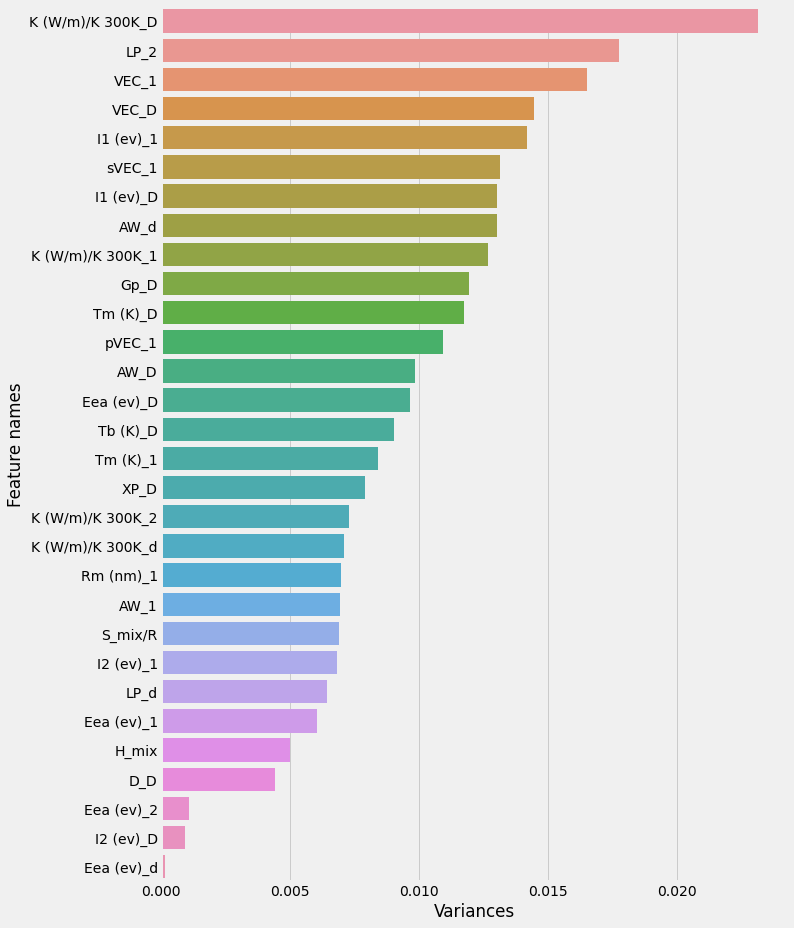

----------------------------------------------------------------------------------------------------


OrderedSet(['I1 (ev)_1', 'I1 (ev)_D', 'Tm (K)_D', 'AW_d', 'Gp_D', 'VEC_1', 'VEC_D', 'sVEC_1', 'pVEC_1', 'K (W/m)/K 300K_1', 'K (W/m)/K 300K_D', 'LP_2'])

----------------------------------------------------------------------------------------------------
Number of features selected: 12


In [ ]:
# Create variance threshold model instance
variance_threshold_model = VarianceThreshold(threshold=0.01)

# Fit model on train data
fitted_variance_threshold_model = variance_threshold_model.fit(X_train[selected_feature_subsets_dict['Correlation']])

# Initiate dataframe to store variance threshold results
variance_threshold_results_df = pd.DataFrame()

# Get feature names
variance_threshold_results_df['Feature names'] = X_train[selected_feature_subsets_dict['Correlation']].columns
variance_threshold_results_df['Variances'] = fitted_variance_threshold_model.variances_

# Sort according to variance values
variance_threshold_results_df.sort_values(by='Variances', ascending=False, inplace=True, ignore_index=True)

# Display
print(variance_threshold_results_df.to_string())
print('--'*50)

# Plot
plt.figure(figsize=(10,15))
sns.barplot(data=variance_threshold_results_df, x='Variances', y='Feature names')
plt.show()
print('--'*50)

# Get features selected based on variance threshold
selected_features_indices_boolean_list = fitted_variance_threshold_model.get_support()
selected_feature_subsets_dict['Variance threshold'] = OrderedSet(X_train[selected_feature_subsets_dict['Correlation']].columns[selected_features_indices_boolean_list])

# Display selected features set
display(selected_feature_subsets_dict['Variance threshold'])
print('--'*50)
print(f"Number of features selected: {len(selected_feature_subsets_dict['Variance threshold'])}")

### Based on mutual information

Useful resources
1. https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py

2. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif

3. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression

            Features  Mutual info
0            S_mix/R     0.235204
1               Gp_D     0.191465
2              VEC_D     0.181135
3   K (W/m)/K 300K_2     0.168096
4              VEC_1     0.164163
5               XP_D     0.145958
6             pVEC_1     0.141265
7          I2 (ev)_D     0.139732
8   K (W/m)/K 300K_d     0.132142
9   K (W/m)/K 300K_1     0.132094
10              LP_d     0.130566
11  K (W/m)/K 300K_D     0.129159
12          Tb (K)_D     0.122856
13         Rm (nm)_1     0.120532
14        Eea (ev)_2     0.114382
15              AW_1     0.113087
16            sVEC_1     0.111472
17         I1 (ev)_1     0.109394
18          Tm (K)_1     0.107119
19             H_mix     0.100900
20              LP_2     0.098837
21              AW_D     0.096444
22               D_D     0.090092
23         I2 (ev)_1     0.082646
24          Tm (K)_D     0.081587
25              AW_d     0.079207
26        Eea (ev)_1     0.078346
27        Eea (ev)_d     0.073760
28         I1 

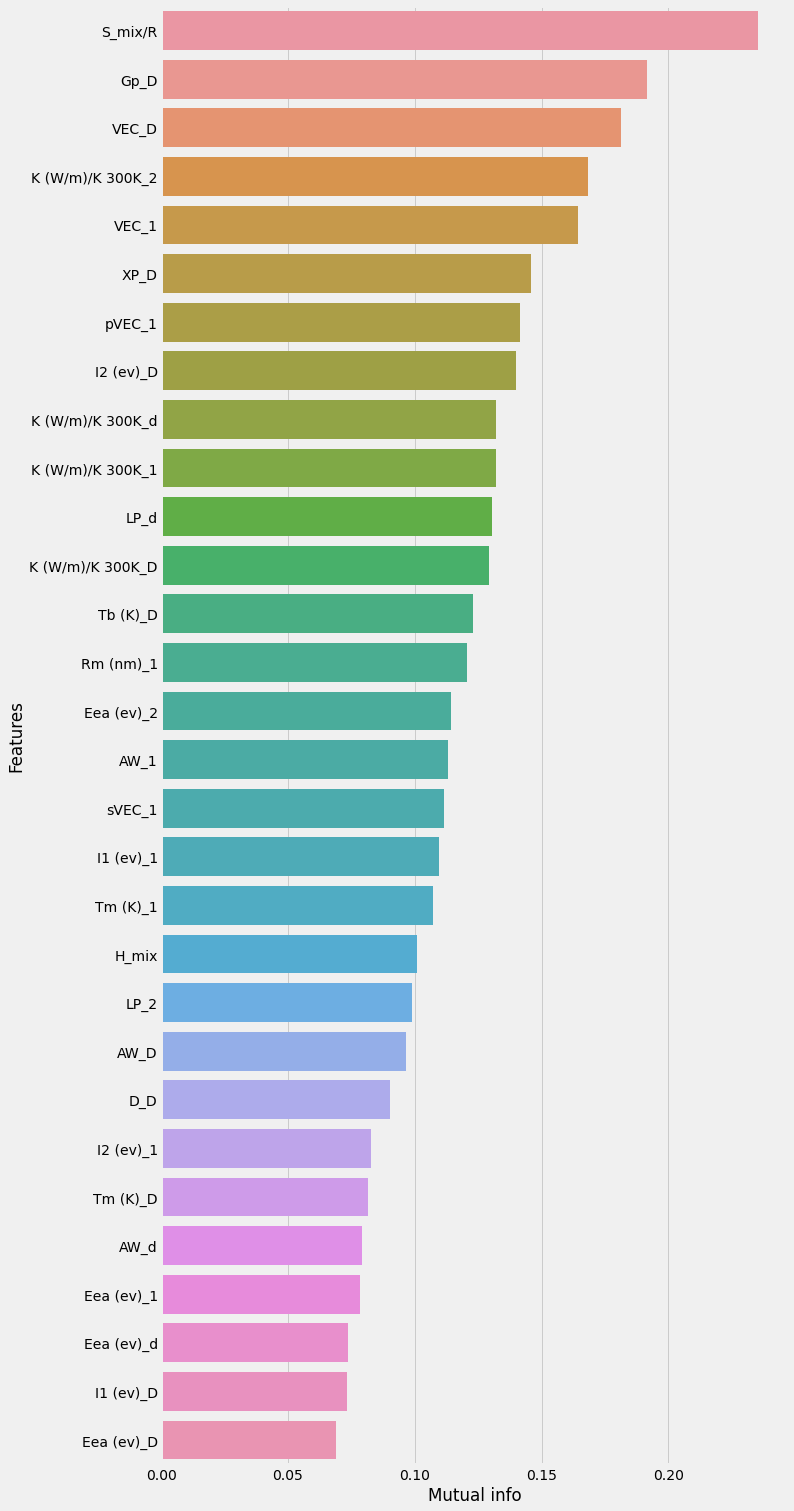

In [ ]:
mutual_info_df = pd.DataFrame()

mutual_info_df['Features'] = X_train[selected_feature_subsets_dict['Correlation']].columns
mutual_info_df['Mutual info'] = mutual_info_regression(X_train[selected_feature_subsets_dict['Correlation']], y_train)

mutual_info_df.sort_values(by='Mutual info', ascending=False, ignore_index=True, inplace=True)

# Display
print(mutual_info_df.to_string())

# Plot
plt.figure(figsize=(10,25))
sns.barplot(data=mutual_info_df, y='Features', x='Mutual info')

In [ ]:
# Set mutual information threshold
minimum_allowed_mutual_info = mutual_info_df['Mutual info'].mean()

# Get the set of features selected on the basis of mutual gain
selected_feature_subsets_dict['Mutual info'] = OrderedSet(mutual_info_df.loc[mutual_info_df['Mutual info'] >= minimum_allowed_mutual_info , 'Features'])

# Display
display(selected_feature_subsets_dict['Mutual info'])
print('--'*50)
print(f"Number of features in the set: {len(selected_feature_subsets_dict['Mutual info'])}")

OrderedSet(['S_mix/R', 'Gp_D', 'VEC_D', 'K (W/m)/K 300K_2', 'VEC_1', 'XP_D', 'pVEC_1', 'I2 (ev)_D', 'K (W/m)/K 300K_d', 'K (W/m)/K 300K_1', 'LP_d', 'K (W/m)/K 300K_D', 'Tb (K)_D', 'Rm (nm)_1'])

----------------------------------------------------------------------------------------------------
Number of features in the set: 14


### Show features selected so far (based on filter methods)

In [ ]:
selected_feature_subsets_dict

OrderedDict([('All',
              OrderedSet(['Eea (ev)_1', 'Eea (ev)_2', 'Eea (ev)_D', 'Eea (ev)_d', 'I1 (ev)_1', 'I1 (ev)_2', 'I1 (ev)_D', 'I1 (ev)_d', 'I2 (ev)_1', 'I2 (ev)_2', 'I2 (ev)_D', 'I2 (ev)_d', 'Tm (K)_1', 'Tm (K)_2', 'Tm (K)_D', 'Tm (K)_d', 'AW_1', 'AW_2', 'AW_D', 'AW_d', 'AN_1', 'AN_2', 'AN_D', 'AN_d', 'Rm (nm)_1', 'Rm (nm)_2', 'Rm (nm)_D', 'Rm (nm)_d', 'Rc (nm)_1', 'Rc (nm)_2', 'Rc (nm)_D', 'Rc (nm)_d', 'Gp_1', 'Gp_2', 'Gp_D', 'Gp_d', 'P_1', 'P_2', 'P_D', 'P_d', 'VEC_1', 'VEC_2', 'VEC_D', 'VEC_d', 'sVEC_1', 'f_sVEC', 'pVEC_1', 'f_pVEC', 'dVEC_1', 'f_dVEC', 'XP_1', 'XP_2', 'XP_D', 'XP_d', 'XM_1', 'XM_2', 'XM_D', 'XM_d', 'Cp (J/molK)_1', 'Cp (J/molK)_2', 'Cp (J/molK)_D', 'Cp (J/molK)_d', 'K (W/m)/K 300K_1', 'K (W/m)/K 300K_2', 'K (W/m)/K 300K_D', 'K (W/m)/K 300K_d', 'W_1', 'W_2', 'W_D', 'W_d', 'D_1', 'D_2', 'D_D', 'D_d', 'Hf (kJ/mol)_1', 'Hf (kJ/mol)_2', 'Hf (kJ/mol)_D', 'Hf (kJ/mol)_d', 'LP_1', 'LP_2', 'LP_D', 'LP_d', 'Tb (K)_1', 'Tb (K)_2', 'Tb (K)_D', 'Tb (K)_d', 'H_mi

## Models selection

Useful resources:
1. https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2

2. https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1

In [ ]:
models_dict = {
    # 'Random Forest': Pipeline([('Min max scaler', MinMaxScaler(feature_range=(0.2, 0.8))),
    #                           ('Random forest Regressor', RandomForestRegressor(n_jobs=1, random_state=7))]),
    'Random Forest': RandomForestRegressor(n_jobs=1, random_state=7),
    'Logistic': LogisticRegression(n_jobs=-1),
    'K-Neighbors': KNeighborsRegressor(n_jobs=-1),
    'Support Vector (rbf)': SVR(kernel='rbf'),
    'Decision Tree': DecisionTreeRegressor(random_state=7),
    'Gradient Boosting': GradientBoostingRegressor(random_state=7),
    'Ada Boost': AdaBoostRegressor(random_state=7),
    'Extreme Gradient Boosting': XGBRegressor(random_state=7),
    'Light Gradient Boosting Machine': LGBMRegressor(random_state=7),
    'Cat boost': CatBoostRegressor(random_state=7)
}


# Initiate results dataframe
models_comparison_results_dict = {}

for model_name, model in models_dict.items():
    # Display current model
    print(f'Trying {model_name}: ')

    # Get cross validation score
    r2_cross_validation_score = cross_val_score(estimator=model, X=X_train, y=y_train, scoring='r2', 
                                                                cv=10, 
                                                                n_jobs=-1, verbose=100)

    # Display
    print(f'{r2_cross_validation_score.mean():.3f}')

    models_comparison_results_dict.setdefault('Regressor model', []).append(model_name)
    models_comparison_results_dict.setdefault('Mean R-squared score', []).append(r2_cross_validation_score.mean())
    models_comparison_results_dict.setdefault('Std R-squared score', []).append(r2_cross_validation_score.std())

# Convert results to dataframe
models_comparison_results_df = pd.DataFrame.from_dict(models_comparison_results_dict)    

# Sort based on R-squared score 
models_comparison_results_df.sort_values(by='Mean R-squared score', ascending=False, inplace=True, ignore_index=True)

# Display
display(models_comparison_results_df)

# Save results
save_path = '/content/drive/MyDrive/DDP/Stored data/Dmax/models_comparison_results_df.csv'
models_comparison_results_df.to_csv(save_path)

Trying Random Forest: 
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:  5.4min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  6.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  6.7min finished
0.637
Trying Logistic: 
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0283s.) Setting bat

,Regressor model,Mean R-squared score,Std R-squared score
0,Light Gradient Boosting Machine,0.694946,0.148875
1,Cat boost,0.678765,0.267998
2,Random Forest,0.637176,0.161134
3,K-Neighbors,0.603093,0.122415
4,Extreme Gradient Boosting,0.579366,0.188188
5,Gradient Boosting,0.557414,0.176869
6,Support Vector (rbf),0.149332,0.030081
7,Decision Tree,0.066231,0.371257
8,Ada Boost,-0.393887,0.316052
9,Logistic,NaN,NaN


In [ ]:
# Load model comparison results
saved_path = '/content/drive/MyDrive/DDP/Stored data/Dmax/models_comparison_results_df.csv'
models_comparison_results_df = pd.read_csv(saved_path, index_col=0)

# Set indices to start from 1
models_comparison_results_df.index += 1

# Display
models_comparison_results_df

,Regressor model,Mean R-squared score,Std R-squared score
1,Light Gradient Boosting Machine,0.694946,0.148875
2,Cat boost,0.678765,0.267998
3,Random Forest,0.637176,0.161134
4,K-Neighbors,0.603093,0.122415
5,Extreme Gradient Boosting,0.579366,0.188188
6,Gradient Boosting,0.557414,0.176869
7,Support Vector (rbf),0.149332,0.030081
8,Decision Tree,0.066231,0.371257
9,Ada Boost,-0.393887,0.316052
10,Logistic,NaN,NaN
